# Dataset sul Traffico di Rete

Il dataset che useremo in questa esercitazione contiene caratteristiche estratte da sessioni di traffico di rete, progettate per l'analisi e il rilevamento di malware basato sul comportamento della rete. Le caratteristiche sono organizzate in diverse categorie funzionali.

## Categorie principali di caratteristiche

### Informazioni sulla sessione
- **Informazioni temporali**: `start`, `duration`, `cap_date`, `daysTime`, `weekDay`
- **Informazioni di connessione**: Indirizzi IP e porte (`...ip`, `...port`)
- **Etichette**: `label`, `labelSS` (classificazione del malware)

### Metriche TCP/IP
- **Statistiche pacchetti**: Conteggio pacchetti (`packets_...`), dimensioni (`packetsize...`), rapporti (`packetsAB_ratio`)
- **Flag TCP**: Pacchetti ACK (`ack_...`), PUSH (`push_...`), RESET (`reset_...`), URG (`urg_...`)
- **Tempi di arrivo**: Tempi tra pacchetti (`packetinterarrivel_...`)
- **Time-to-live**: Valori TTL per pacchetti client/server (`ttl_...`, `ttlA...`, `ttlB...`)
- **Analisi TCP**: Pacchetti persi, ritrasmessi (`tcpanalysis...`)
- **Bytes trasferiti**: Totali e rapporti (`bytes_...`, `bytesAB_ratio`)

### Protocollo HTTP
- **Richieste HTTP**: Metodi GET/POST (`http_GET`, `http_POST`), conteggi (`httpcount...`)
- **Bytes HTTP**: Dimensioni richieste/risposte (`httpreqbytes_...`, `httprespbytes_...`)
- **Tempi HTTP**: Tempi di risposta (`httptime...`), tempi tra richiesta e risposta (`httpinterarrivel_...`)
- **Cookie**: Conteggio e valori (`httpcookiecount`, `httpcookievalues_...`)
- **Host dominante**: URL, rank Alexa, tipo di browser (`httpdom...`)
- **Classificazione URL**: Identificatori per CDN, ad, cloud, ecc. (`iscdnhttp`, `isadhttp`, `iscloudhttp`, etc.)

### Protocollo DNS
- **Risposta DNS**: Conteggio indirizzi, risposte, flag (`dnscountaddresses`, `dns_flag`)
- **Hostname DNS**: Nome host, TTL (`dnshostname`, `dnsminttl`)
- **Tempi DNS**: Tempo di risposta (`dns_time`)
- **Rank Alexa**: Rank del server nella risposta DNS (`dns_alexaRank`)

### Protocollo SSL/TLS
- **Handshake SSL**: Durata (`sslhandshakeduration_...`)
- **Bytes SSL**: Bytes richiesta/risposta (`sslreqbytes_...`, `sslrespbytes_...`)
- **Certificati**: Conteggio, rapporti (`sslcountcertificates`, `sslratio...`)
- **Cifrari e algoritmi**: Conteggio cifrari supportati (`sslcountclient_...`, `sslcountserver_...`)
- **Versioni SSL**: Numero di versioni, versione dominante (`ssldomserver_ciphersuite`, `ssldomserver_compression`)

### Informazioni geografiche e di routing
- **ASN**: Numero di sistemi autonomi (`asn_...`)
- **Paesi**: Numero di paesi per client/server (`country_...`)


# Obiettivo
  Partendo dalle varie features che corrispondono a come un dispositivo interagisce nella rete, bisogna classificare la tipologia di dispositivo (`device_category`)

In [1]:
import pandas as pd
df = pd.read_csv('iot_device_test.csv')

### Stampiamo le colonne

In [2]:
df.columns

Index(['ack', 'ack_A', 'ack_B', 'bytes', 'bytes_A', 'bytes_A_B_ratio',
       'bytes_B', 'ds_field_A', 'ds_field_B', 'duration',
       ...
       'suffix_is_co.il', 'suffix_is_com', 'suffix_is_com.sg',
       'suffix_is_else', 'suffix_is_empty_char_value',
       'suffix_is_googleapis.com', 'suffix_is_net', 'suffix_is_org',
       'suffix_is_unresolved', 'device_category'],
      dtype='object', length=298)

### Vediamo che tipologia di valori dobbiamo classificare

In [3]:
df["device_category"]

0      baby_monitor
1      baby_monitor
2      baby_monitor
3      baby_monitor
4      baby_monitor
           ...     
895           watch
896           watch
897           watch
898           watch
899           watch
Name: device_category, Length: 900, dtype: object

In [4]:
#Vediamo quali sono i device che abbiamo
df["device_category"].unique()

array(['baby_monitor', 'lights', 'motion_sensor', 'security_camera',
       'smoke_detector', 'socket', 'thermostat', 'TV', 'watch'],
      dtype=object)

In [5]:
#Vediamo come sono distribuiti i device
df["device_category"].value_counts()
#Abbiamo quindi un dataset bilanciato.

device_category
baby_monitor       100
lights             100
motion_sensor      100
security_camera    100
smoke_detector     100
socket             100
thermostat         100
TV                 100
watch              100
Name: count, dtype: int64

In [6]:
#Per ogni categoria dobbiamo assegnare un id che funziona da label per la classificazione
devices = df["device_category"].unique()


In [7]:
device_id_mapping = {i: device for i, device in enumerate(devices)}
print(device_id_mapping)

{0: 'baby_monitor', 1: 'lights', 2: 'motion_sensor', 3: 'security_camera', 4: 'smoke_detector', 5: 'socket', 6: 'thermostat', 7: 'TV', 8: 'watch'}


In [8]:
df['device_category'] = df['device_category'].map({device: i for i, device in enumerate(devices)})


In [9]:
df['device_category']

0      0
1      0
2      0
3      0
4      0
      ..
895    8
896    8
897    8
898    8
899    8
Name: device_category, Length: 900, dtype: int64

### Proviamo a filtrare qualche colonna in base al modulo della correlazione

In [10]:
# Calcolo le correlazioni con la variabile target
correlations = df.corrwith(df['device_category'])
# Filtro le features con correlazione superiore a 0.3 in valore assoluto
significant_features = correlations[abs(correlations) > 0.3].index.tolist()
# Rimuovo la variabile target dall'elenco delle features se presente
if 'device_category' in significant_features:
    significant_features.remove('device_category')

# Creao un nuovo DataFrame con solo le features significative e la variabile target
df = df[significant_features + ['device_category']]
# Visualizzare le dimensioni del nuovo DataFrame
print(f"Dimensioni del nuovo DataFrame: {df.shape}")
print(f"Features selezionate: {len(significant_features)}")

Dimensioni del nuovo DataFrame: (900, 23)
Features selezionate: 22


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [11]:
df.head()

,packet_size_A_entropy,packet_size_A_thirdQ,packet_size_avg,packet_size_max,reset_A,reset_B,ssl_count_client_compressions,ssl_count_client_mac_algs,ssl_count_server_ciphersuite,ssl_count_server_compression,...,ssl_count_version,ssl_dom_version,ssl_ratio_server_name,ssl_req_bytes_min,ttl_B_min,ttl_B_stdev,ttl_max,ttl_thirdQ,is_ssl,device_category
0,1.653997,85.5,300.487805,1400,2,0,1,1,1,1,...,1,769,1,32,33,45.201365,225,225.0,1,0
1,1.653997,85.5,300.487805,1400,2,0,1,1,1,1,...,1,769,1,32,33,45.437057,226,226.0,1,0
2,1.653997,85.5,302.048780,1400,2,0,1,1,1,1,...,1,769,1,32,35,45.463948,228,228.0,1,0
3,1.653997,85.5,302.048780,1400,2,0,1,1,1,1,...,1,769,1,32,34,45.699645,228,228.0,1,0
4,1.653997,85.5,279.636364,1400,2,0,1,1,1,1,...,1,769,1,32,34,42.095300,227,227.0,1,0


Abbiamo tanti zeri e uni... Contiamo se ci sono null e filtriamo orizzontalmente in base alla varianza di ogni colonna

In [12]:
# Verifica dei valori NaN
nan_counts = df.isna().sum()
print(f"Colonne con valori NaN:")
print(nan_counts[nan_counts > 0])

Colonne con valori NaN:
Series([], dtype: int64)


In [13]:
import pandas as pd
import numpy as np

def normalize_variance(df):
        return df.var() / df.max()

# Calcola la varianza normalizzata
varianza_norm = normalize_variance(df)

# Ordina le colonne in base alla varianza normalizzata (dal più alto al più basso)
varianza_ordinata = varianza_norm.sort_values(ascending=False)

# Seleziona i nomi delle prime 10 colonne con varianza più alta
top_10_colonne = varianza_ordinata.head(10).index.tolist()

# Stampa i nomi e i valori delle prime 10 colonne
print("Top 10 colonne con varianza normalizzata più alta:")
for colonna in top_10_colonne:
    print(f"{colonna}: {varianza_norm[colonna]}")


df_top_10 = df[top_10_colonne]


Top 10 colonne con varianza normalizzata più alta:
packet_size_max: 247.06329633551908
ssl_dom_version: 190.8223111570862
packet_size_A_thirdQ: 149.26704048019488
packet_size_avg: 34.20503208629437
ttl_thirdQ: 32.72011030653765
ttl_max: 32.40511487709656
ssl_req_bytes_min: 31.008941001977472
ttl_B_min: 12.559702108515637
ttl_B_stdev: 2.125593255157554
device_category: 0.8342602892102335


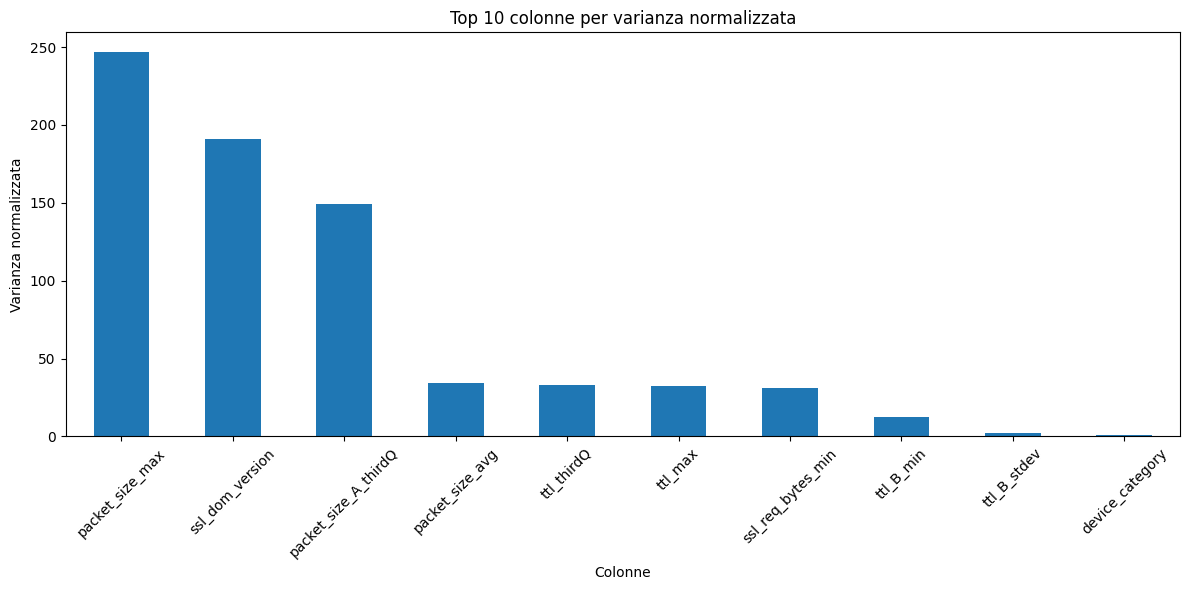

In [14]:
import matplotlib.pyplot as plt

# Visualizza le top 10 colonne con un grafico a barre
plt.figure(figsize=(12, 6))
varianza_ordinata.head(10).plot(kind='bar')
plt.title('Top 10 colonne per varianza normalizzata')
plt.ylabel('Varianza normalizzata')
plt.xlabel('Colonne')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
df_top_10["device_category"] = df['device_category']
cleaned_df = df_top_10

C:\Users\luigi\AppData\Local\Temp\ipykernel_23772\136956294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10["device_category"] = df['device_category']


In [16]:
cleaned_df

,packet_size_max,ssl_dom_version,packet_size_A_thirdQ,packet_size_avg,ttl_thirdQ,ttl_max,ssl_req_bytes_min,ttl_B_min,ttl_B_stdev,device_category
0,1400,769,85.50,300.487805,225.0,225,32,33,45.201365,0
1,1400,769,85.50,300.487805,226.0,226,32,33,45.437057,0
2,1400,769,85.50,302.048780,228.0,228,32,35,45.463948,0
3,1400,769,85.50,302.048780,228.0,228,32,34,45.699645,0
4,1400,769,85.50,279.636364,227.0,227,32,34,42.095300,0
...,...,...,...,...,...,...,...,...,...,...
895,1388,771,0.00,734.094340,64.0,64,985,52,0.197893,8
896,1388,771,23.25,230.269231,64.0,64,1057,53,0.522233,8
897,1388,771,69.50,255.863636,64.0,64,785,51,0.452267,8
898,1388,771,0.00,185.806452,64.0,64,760,52,0.500000,8


In [17]:
class KernelSVM:
    """
    Implementazione di SVM con supporto per diversi kernel non lineari,
    utilizzando l'algoritmo SMO (Sequential Minimal Optimization).
    
    Questo algoritmo risolve il problema duale:
    max Σ α_i - (1/2) Σ Σ α_i α_j y_i y_j K(x_i, x_j)
    vincoli: Σ α_i y_i = 0, 0 ≤ α_i ≤ C
    
    Parametri:
    -----------
    C : float, default=1.0
        Parametro di regolarizzazione per il margine morbido.
    kernel : str, default='linear'
        Tipo di kernel da utilizzare. Opzioni: 'linear', 'poly', 'rbf', 'sigmoid'.
    degree : int, default=3
        Grado del kernel polinomiale (usato solo se kernel='poly').
    gamma : float, default='scale'
        Coefficiente del kernel. Usato per 'rbf', 'poly' e 'sigmoid'.
        Se 'scale', gamma = 1 / (n_features * X.var()).
        Se 'auto', gamma = 1 / n_features.
    coef0 : float, default=0.0
        Termine indipendente nel kernel polinomiale e sigmoide.
    tol : float, default=1e-3
        Tolleranza per i criteri di convergenza.
    max_passes : int, default=5
        Numero massimo di passate senza cambiamenti significativi.
    max_iter : int, default=1000
        Numero massimo di iterazioni per l'ottimizzazione di una coppia di alpha.
    random_state : int, default=None
        Seed per il generatore di numeri casuali.
    """
    
    def __init__(self, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0,
                 tol=1e-3, max_passes=5, max_iter=1000, random_state=None):
        self.C = C
        self.kernel_type = kernel
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.tol = tol
        self.max_passes = max_passes
        self.max_iter = max_iter
        self.random_state = random_state
        # Attributi che verranno inizializzati durante il fit
        self.alphas = None
        self.b = 0.0
        self.support_vector_indices = None
        self.support_vectors = None
        self.support_vector_labels = None
        self.support_vector_alphas = None
        self.X = None
        self.y = None
        self.y_original = None
        self.kernel_matrix = None
        self._gamma = None  # gamma calcolato
        self.w = None  # Solo per kernel lineare
        self.n_samples = None
        self.n_features = None
        self.errors = None
    
    def _compute_gamma(self, X):
        """Calcola il valore di gamma in base all'opzione selezionata"""
        n_features = X.shape[1]
        if self.gamma == 'scale':
            return 1.0 / (n_features * X.var())
        elif self.gamma == 'auto':
            return 1.0 / n_features
        else:
            return self.gamma
    
    def _linear_kernel(self, x1, x2):
        """Kernel lineare: K(x1, x2) = x1 · x2"""
        return np.dot(x1, x2)
    
    def _polynomial_kernel(self, x1, x2):
        """Kernel polinomiale: K(x1, x2) = (gamma * x1 · x2 + coef0)^degree"""
        return (self._gamma * np.dot(x1, x2) + self.coef0) ** self.degree
    
    def _rbf_kernel(self, x1, x2):
        """Kernel RBF (Gaussian): K(x1, x2) = exp(-gamma * ||x1 - x2||^2)"""
        return np.exp(-self._gamma * np.sum((x1 - x2) ** 2))
    
    def _sigmoid_kernel(self, x1, x2):
        """Kernel sigmoide: K(x1, x2) = tanh(gamma * x1 · x2 + coef0)"""
        return np.tanh(self._gamma * np.dot(x1, x2) + self.coef0)
    
    def _kernel_function(self, x1, x2):
        """Seleziona il kernel appropriato"""
        if self.kernel_type == 'linear':
            return self._linear_kernel(x1, x2)
        elif self.kernel_type == 'poly':
            return self._polynomial_kernel(x1, x2)
        elif self.kernel_type == 'rbf':
            return self._rbf_kernel(x1, x2)
        elif self.kernel_type == 'sigmoid':
            return self._sigmoid_kernel(x1, x2)
        else:
            raise ValueError(f"Kernel '{self.kernel_type}' non supportato")
    
    def _compute_kernel_matrix(self, X):
        """Calcola la matrice del kernel per tutti i punti"""
        n_samples = X.shape[0]
        K = np.zeros((n_samples, n_samples))
        
        for i in range(n_samples):
            for j in range(i, n_samples):
                K_ij = self._kernel_function(X[i], X[j])
                K[i, j] = K_ij
                K[j, i] = K_ij  # La matrice è simmetrica
        
        return K
    
    def _compute_error(self, i):
        """Calcola l'errore per il punto i"""
        if self.kernel_type == 'linear' and self.w is not None:
            # Per kernel lineare usiamo direttamente w·x + b
            f_i = np.dot(self.X[i], self.w) + self.b
        else:
            # Per kernel non lineari usiamo la formula duale
            f_i = self.b
            for j in range(len(self.alphas)):
                if self.alphas[j] > 0:  # Solo i support vector contribuiscono
                    f_i += self.alphas[j] * self.y[j] * self.kernel_matrix[j, i]
        
        return f_i - self.y[i]
    
    def _compute_bounds(self, i, j):
        """Calcola i limiti L e H per gli alphas"""
        if self.y[i] != self.y[j]:
            L = max(0, self.alphas[j] - self.alphas[i])
            H = min(self.C, self.C + self.alphas[j] - self.alphas[i])
        else:
            L = max(0, self.alphas[i] + self.alphas[j] - self.C)
            H = min(self.C, self.alphas[i] + self.alphas[j])
        return L, H
    
    def _select_second_alpha(self, i):
        """Seleziona il secondo alpha per l'ottimizzazione"""
        errors = self.errors.copy()
        valid_indices = np.arange(len(errors)) != i
        errors_valid = errors[valid_indices]
        indices_valid = np.arange(len(errors))[valid_indices]
        
        # Troviamo l'indice con il massimo errore rispetto a i
        if self.errors[i] > 0:
            j = indices_valid[np.argmin(errors_valid)]
        else:
            j = indices_valid[np.argmax(errors_valid)]
        
        return j
    
    def fit(self, X, y):
        """
        Addestra il modello SVM sui dati di training.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Training vectors.
        y : array-like, shape (n_samples,)
            Target values, deve contenere -1 e 1 o 0 e 1.
        
        Returns:
        --------
        self : oggetto
            Ritorna self.
        """
        # Inizializzazione
        if self.random_state is not None:
            np.random.seed(self.random_state)
            
        self.n_samples, self.n_features = X.shape
        
        # Convertiamo le etichette in -1/1
        self.y_original = y.copy()
        self.y = np.where(y <= 0, -1, 1)
        self.X = X
        
        # Calcoliamo gamma
        self._gamma = self._compute_gamma(X)
        
        # Calcola la matrice del kernel
        print(f"Calcolo della matrice del kernel {self.kernel_type}...")
        self.kernel_matrix = self._compute_kernel_matrix(X)
        
        # Inizializziamo gli alpha, b e gli errori
        self.alphas = np.zeros(self.n_samples)
        self.b = 0
        self.errors = np.zeros(self.n_samples)
        
        for i in range(self.n_samples):
            self.errors[i] = self._compute_error(i)
        
        print(f"Inizio addestramento SVM con kernel {self.kernel_type} usando SMO...")
        
        # Implementazione dell'algoritmo SMO
        num_changed = 0
        examine_all = True
        passes = 0
        
        while (passes < self.max_passes) and (num_changed > 0 or examine_all):
            num_changed = 0
            
            if examine_all:
                # Esaminiamo tutti i punti
                for i in range(self.n_samples):
                    num_changed += self._examine_example(i)
            else:
                # Esaminiamo solo i punti con 0 < alpha < C
                non_bound_indices = np.where((self.alphas > 0) & (self.alphas < self.C))[0]
                for i in non_bound_indices:
                    num_changed += self._examine_example(i)
            
            if examine_all:
                examine_all = False
            elif num_changed == 0:
                examine_all = True
            
            passes += 1
            if passes % 5 == 0:
                print(f"Passata {passes}, {num_changed} cambiamenti")
        
        # Identifichiamo i support vector
        sv_indices = np.where(self.alphas > self.tol)[0]
        self.support_vector_indices = sv_indices
        self.support_vectors = X[sv_indices]
        self.support_vector_labels = self.y[sv_indices]
        self.support_vector_alphas = self.alphas[sv_indices]
        
        # Per kernel lineare, calcoliamo esplicitamente w
        if self.kernel_type == 'linear':
            self.w = np.zeros(self.n_features)
            for i in sv_indices:
                self.w += self.alphas[i] * self.y[i] * X[i]
        
        print(f"Addestramento completato in {passes} passate!")
        print(f"Numero di support vectors: {len(sv_indices)} su {self.n_samples} punti ({len(sv_indices)/self.n_samples*100:.1f}%)")
        
        if self.kernel_type == 'linear':
            print(f"Norma del vettore w: {np.linalg.norm(self.w):.6f}")
        
        return self
    
    def _examine_example(self, i):
        """Esamina un esempio e aggiorna gli alpha se necessario"""
        y_i = self.y[i]
        alpha_i = self.alphas[i]
        E_i = self.errors[i]
        r_i = E_i * y_i
        
        # Verifico se viola le condizioni KKT
        if ((r_i < -self.tol and alpha_i < self.C) or (r_i > self.tol and alpha_i > 0)):
            # Provo a ottimizzare con un secondo alpha
            j = self._select_second_alpha(i)
            return self._take_step(i, j)
        
        return 0
    
    def _take_step(self, i, j):
        """Esegue l'ottimizzazione per la coppia di alpha (i, j)"""
        if i == j:
            return 0
        
        alpha_i = self.alphas[i]
        alpha_j = self.alphas[j]
        y_i = self.y[i]
        y_j = self.y[j]
        E_i = self.errors[i]
        E_j = self.errors[j]
        
        # Calcolo i limiti L e H
        L, H = self._compute_bounds(i, j)
        if L == H:
            return 0
        
        # Calcolo eta = K_ii + K_jj - 2K_ij
        eta = self.kernel_matrix[i, i] + self.kernel_matrix[j, j] - 2 * self.kernel_matrix[i, j]
        
        if eta <= 0:
            # Questo può accadere con kernel non PSD (positivo semidefinito)
            return 0
        
        # Calcolo il nuovo valore di alpha_j
        alpha_j_new = alpha_j + y_j * (E_i - E_j) / eta
        
        # Limitiamo alpha_j ai vincoli
        if alpha_j_new > H:
            alpha_j_new = H
        elif alpha_j_new < L:
            alpha_j_new = L
        
        # Se il cambiamento è troppo piccolo, non facciamo nulla
        if abs(alpha_j_new - alpha_j) < 1e-5:
            return 0
        
        # Calcoliamo alpha_i_new
        alpha_i_new = alpha_i + y_i * y_j * (alpha_j - alpha_j_new)
        
        # Aggiorniamo il bias
        b_old = self.b
        
        # Aggiorniamo b in modo che gli errori siano 0 per i punti i e j
        b1 = b_old - E_i
        b1 -= y_i * (alpha_i_new - alpha_i) * self.kernel_matrix[i, i]
        b1 -= y_j * (alpha_j_new - alpha_j) * self.kernel_matrix[i, j]
             
        b2 = b_old - E_j
        b2 -= y_i * (alpha_i_new - alpha_i) * self.kernel_matrix[i, j]
        b2 -= y_j * (alpha_j_new - alpha_j) * self.kernel_matrix[j, j]
        
        if 0 < alpha_i_new < self.C:
            self.b = b1
        elif 0 < alpha_j_new < self.C:
            self.b = b2
        else:
            self.b = (b1 + b2) / 2
        
        # Aggiorniamo il vettore dei pesi per kernel lineare
        if self.kernel_type == 'linear' and self.w is not None:
            self.w = self.w + y_i * (alpha_i_new - alpha_i) * self.X[i] + y_j * (alpha_j_new - alpha_j) * self.X[j]
        
        # Aggiorniamo gli alpha
        self.alphas[i] = alpha_i_new
        self.alphas[j] = alpha_j_new
        
        # Aggiorniamo gli errori
        for k in range(len(self.errors)):
            self.errors[k] = self._compute_error(k)
        
        return 1
    
    def predict(self, X):
        """
        Predice la classe per i punti X.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Punti da classificare.
            
        Returns:
        --------
        y_pred : array, shape (n_samples,)
            Classi predette (-1 o 1).
        """
        return np.sign(self.decision_function(X))
    
    def predict_class(self, X):
        """
        Predice la classe originale (0 o 1) per i punti X.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Punti da classificare.
            
        Returns:
        --------
        y_pred : array, shape (n_samples,)
            Classi predette (0 o 1).
        """
        raw_predictions = self.predict(X)
        # Convertiamo da -1/1 a 0/1 se necessario
        if np.any(self.y_original == 0):
            return np.where(raw_predictions < 0, 0, 1)
        else:
            return raw_predictions
    
    def decision_function(self, X):
        """
        Calcola i valori della funzione di decisione.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Punti da valutare.
            
        Returns:
        --------
        decision : array, shape (n_samples,)
            Valori della funzione di decisione.
        """
        # Per kernel lineare, possiamo usare w·x + b
        if self.kernel_type == 'linear' and self.w is not None:
            return np.dot(X, self.w) + self.b
        
        # Per kernel non lineari, usiamo la formulazione duale
        n_samples = X.shape[0]
        decision = np.zeros(n_samples)
        
        for i in range(n_samples):
            decision[i] = self.b
            
            # Sommiamo solo sui support vector per efficienza
            for j, sv_idx in enumerate(self.support_vector_indices):
                decision[i] += self.support_vector_alphas[j] * self.support_vector_labels[j] * \
                              self._kernel_function(self.support_vectors[j], X[i])
        
        return decision
    
    def plot_decision_boundary(self, X, y, feature_indices=(0, 1), title=None):
        """
        Visualizza il confine di decisione SVM per due feature selezionate.
        
        Parametri:
        -----------
        X : array-like di shape (n_samples, n_features)
            Dataset
        y : array-like di shape (n_samples,)
            Etichette, in {0, 1} o {-1, 1}
        feature_indices : tuple, default=(0, 1)
            Indici delle due feature da visualizzare
        title : str, optional
            Titolo del grafico. Se None, viene generato automaticamente.
        """
        if title is None:
            title = f"Confine di decisione SVM con kernel {self.kernel_type}"
            if self.kernel_type == 'poly':
                title += f" (grado {self.degree})"
            elif self.kernel_type in ['rbf', 'sigmoid']:
                title += f" (gamma {self._gamma:.4f})"
        
        # Convertiamo le etichette 0/1 in -1/1 se necessario
        y_binary = np.where(y <= 0, -1, 1)
        
        # Estraiamo le due feature
        X_plot = X[:, feature_indices]
        
        # Creiamo una griglia per visualizzare il confine di decisione
        x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
        y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))
        
        # Prepariamo i punti della griglia
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        
        # Se abbiamo più di due feature, dobbiamo aggiungere le altre feature
        if X.shape[1] > 2:
            # Calcoliamo i valori medi delle altre feature
            mean_values = X.mean(axis=0)
            
            # Creiamo una matrice di punti completa
            full_grid_points = np.zeros((grid_points.shape[0], X.shape[1]))
            for i in range(X.shape[1]):
                if i == feature_indices[0]:
                    full_grid_points[:, i] = grid_points[:, 0]
                elif i == feature_indices[1]:
                    full_grid_points[:, i] = grid_points[:, 1]
                else:
                    full_grid_points[:, i] = mean_values[i]
            
            # Calcoliamo i valori della funzione di decisione
            Z = self.decision_function(full_grid_points)
        else:
            # Se abbiamo solo due feature, possiamo usare direttamente i punti della griglia
            Z = self.decision_function(grid_points)
        
        # Riformattiamo Z per la visualizzazione
        Z = Z.reshape(xx.shape)
        
        plt.figure(figsize=(10, 8))
        
        # Visualizziamo il confine di decisione e i margini
        plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, 
                     colors=('skyblue', 'white', 'salmon'))
        plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=('blue', 'black', 'red'), 
                    linewidths=(1, 2, 1))
        
        # Visualizziamo i punti di training
        plt.scatter(X_plot[y_binary == 1, 0], X_plot[y_binary == 1, 1], 
                   c='red', marker='o', edgecolors='k', label='Classe 1')
        plt.scatter(X_plot[y_binary == -1, 0], X_plot[y_binary == -1, 1], 
                   c='blue', marker='s', edgecolors='k', label='Classe 0')
        
        # Evidenziamo i support vector
        if hasattr(self, 'support_vector_indices') and self.support_vector_indices is not None:
            sv_indices_plot = self.support_vector_indices
            plt.scatter(X_plot[sv_indices_plot, 0], X_plot[sv_indices_plot, 1], 
                       s=100, facecolors='none', edgecolors='green', linewidths=2, 
                       label='Support Vectors')
        
        plt.title(title)
        plt.xlabel(f'Feature {feature_indices[0]}')
        plt.ylabel(f'Feature {feature_indices[1]}')
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    def visualize_kernel_space(self, X, y, n_components=2, title=None):
        """
        Visualizza i dati nello spazio del kernel usando PCA.
        Questo è utile per vedere come il kernel trasforma i dati per renderli separabili.
        
        Parametri:
        -----------
        X : array-like di shape (n_samples, n_features)
            Dataset
        y : array-like di shape (n_samples,)
            Etichette, in {0, 1} o {-1, 1}
        n_components : int, default=2
            Numero di componenti da visualizzare (1, 2 o 3)
        title : str, optional
            Titolo del grafico
        """
        from sklearn.decomposition import KernelPCA
        
        if title is None:
            title = f"Proiezione PCA dei dati con kernel {self.kernel_type}"
            if self.kernel_type == 'poly':
                title += f" (grado {self.degree})"
            elif self.kernel_type in ['rbf', 'sigmoid']:
                title += f" (gamma {self._gamma:.4f})"
        
        # Convertiamo le etichette 0/1 in -1/1 se necessario
        y_binary = np.where(y <= 0, -1, 1)
        
        # Configurazione del KernelPCA in base al kernel utilizzato
        kpca_params = {'n_components': n_components, 'kernel': self.kernel_type}
        
        if self.kernel_type == 'poly':
            kpca_params.update({'degree': self.degree, 'gamma': self._gamma, 'coef0': self.coef0})
        elif self.kernel_type in ['rbf', 'sigmoid']:
            kpca_params.update({'gamma': self._gamma})
            if self.kernel_type == 'sigmoid':
                kpca_params.update({'coef0': self.coef0})
        
        # Trasformiamo i dati usando KernelPCA
        kpca = KernelPCA(**kpca_params)
        X_kpca = kpca.fit_transform(X)
        
        # Visualizziamo i dati trasformati
        if n_components == 1:
            plt.figure(figsize=(10, 6))
            plt.scatter(X_kpca[y_binary == 1], np.zeros_like(X_kpca[y_binary == 1]), 
                       c='red', marker='o', edgecolors='k', label='Classe 1')
            plt.scatter(X_kpca[y_binary == -1], np.zeros_like(X_kpca[y_binary == -1]), 
                       c='blue', marker='s', edgecolors='k', label='Classe 0')
            plt.axvline(x=0, color='black', linestyle='-', linewidth=2)
            plt.title(title)
            plt.xlabel('Prima componente principale')
            plt.legend()
            
        elif n_components == 2:
            plt.figure(figsize=(10, 8))
            plt.scatter(X_kpca[y_binary == 1, 0], X_kpca[y_binary == 1, 1], 
                       c='red', marker='o', edgecolors='k', label='Classe 1')
            plt.scatter(X_kpca[y_binary == -1, 0], X_kpca[y_binary == -1, 1], 
                       c='blue', marker='s', edgecolors='k', label='Classe 0')
            
            # Evidenziamo i support vector
            if hasattr(self, 'support_vector_indices') and self.support_vector_indices is not None:
                sv_indices = self.support_vector_indices
                sv_kpca = kpca.transform(X[sv_indices])
                plt.scatter(sv_kpca[:, 0], sv_kpca[:, 1], 
                           s=100, facecolors='none', edgecolors='green', linewidths=2, 
                           label='Support Vectors')
            
            plt.title(title)
            plt.xlabel('Prima componente principale')
            plt.ylabel('Seconda componente principale')
            plt.legend()
            
        elif n_components == 3:
            from mpl_toolkits.mplot3d import Axes3D
            
            fig = plt.figure(figsize=(12, 10))
            ax = fig.add_subplot(111, projection='3d')
            
            ax.scatter(X_kpca[y_binary == 1, 0], X_kpca[y_binary == 1, 1], X_kpca[y_binary == 1, 2],
                      c='red', marker='o', edgecolors='k', label='Classe 1')
            ax.scatter(X_kpca[y_binary == -1, 0], X_kpca[y_binary == -1, 1], X_kpca[y_binary == -1, 2],
                      c='blue', marker='s', edgecolors='k', label='Classe 0')
            
            # Evidenziamo i support vector
            if hasattr(self, 'support_vector_indices') and self.support_vector_indices is not None:
                sv_indices = self.support_vector_indices
                sv_kpca = kpca.transform(X[sv_indices])
                ax.scatter(sv_kpca[:, 0], sv_kpca[:, 1], sv_kpca[:, 2],
                          s=100, facecolors='none', edgecolors='green', linewidths=2, 
                          label='Support Vectors')
            
            ax.set_title(title)
            ax.set_xlabel('Prima componente principale')
            ax.set_ylabel('Seconda componente principale')
            ax.set_zlabel('Terza componente principale')
            ax.legend()
        
        plt.tight_layout()
        plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from itertools import combinations

class SVMMulticlassOVO:
    """
    Implementazione di SVM multiclasse usando l'approccio One-vs-One (OVO).
    Funziona con qualsiasi tipo di etichette (numeri, stringhe, etc.).
    
    Nell'approccio OVO, addestriamo un classificatore binario per ogni coppia di classi,
    per un totale di n*(n-1)/2 classificatori, dove n è il numero di classi.
    """
    
    def __init__(self, svm_class=None, **svm_params):
        """
        Inizializzazione del modello
        
        Parametri:
        svm_class -- classe SVM da utilizzare (deve avere metodi fit, predict)
        svm_params -- parametri da passare al classificatore SVM
        """
        self.svm_class = svm_class  # Classe del classificatore SVM da utilizzare
        self.svm_params = svm_params
        self.classifiers = []  # Lista di tuple (classificatore, classe_i, classe_j)
        self.classes = None
    
    def fit(self, X, y):
        """
        Addestra un classificatore SVM per ogni coppia di classi usando l'approccio OVO
        
        Parametri:
        X -- matrice delle feature
        y -- vettore delle etichette
        """
        # Memorizziamo le classi originali (qualsiasi tipo)
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Calcoliamo il numero di classificatori necessari
        n_classifiers = n_classes * (n_classes - 1) // 2
        print(f"Addestramento di {n_classifiers} classificatori SVM (OVO)...")
        
        # Generiamo tutte le coppie di classi
        class_pairs = list(combinations(range(n_classes), 2))
        
        # Addestriamo un classificatore per ogni coppia di classi
        for idx, (i, j) in enumerate(class_pairs):
            class_i = self.classes[i]
            class_j = self.classes[j]
            print(f"Classificatore {idx+1}/{n_classifiers}: classe {class_i} vs classe {class_j}")
            
            # Filtriamo i dati per le due classi
            mask = np.logical_or(y == class_i, y == class_j)
            X_subset = X[mask]
            y_subset = y[mask]
            
            # Creiamo etichette binarie: +1 per classe_i, -1 per classe_j
            y_binary = np.ones(len(y_subset)) * -1
            y_binary[y_subset == class_i] = 1
            
            # Creiamo il classificatore
            if self.svm_class is None:
                # Se non è specificata una classe, utilizziamo LinearSVM
                classifier = LinearSVM(**self.svm_params)
            else:
                # Altrimenti usiamo la classe specificata
                classifier = self.svm_class(**self.svm_params)
            
            # Addestriamo il classificatore
            classifier.fit(X_subset, y_binary)
            
            # Aggiungiamo il classificatore alla lista con le informazioni sulle classi
            self.classifiers.append((classifier, class_i, class_j))
        
        print("Addestramento OVO completato!")
        return self
    
    def predict(self, X):
        """
        Predice la classe usando il voto di maggioranza tra tutti i classificatori
        
        Parametri:
        X -- matrice delle feature
        
        Restituisce:
        y_pred -- vettore delle classi predette
        """
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        
        # Matrice dei voti: ogni riga è un campione, ogni colonna è una classe
        votes = np.zeros((n_samples, n_classes))
        
        # Per ogni classificatore binario
        for classifier, class_i, class_j in self.classifiers:
            # Otteniamo le predizioni
            predictions = classifier.predict(X)
            
            # Troviamo l'indice della classe_i e classe_j
            i = np.where(self.classes == class_i)[0][0]
            j = np.where(self.classes == class_j)[0][0]
            
            # Aggiungiamo un voto per la classe predetta
            for k in range(n_samples):
                if predictions[k] > 0:  # Classe i vince
                    votes[k, i] += 1
                else:  # Classe j vince
                    votes[k, j] += 1
        
        # La classe predetta è quella con il massimo numero di voti
        predicted_indices = np.argmax(votes, axis=1)
        
        # Debug: stampiamo la distribuzione dei voti per alcuni esempi
        if n_samples > 0:
            print("\nEsempio di voti per 3 istanze:")
            for k in range(min(3, n_samples)):
                vote_str = " ".join([f"{self.classes[i]}: {votes[k, i]}" for i in range(n_classes)])
                print(f"Istanza {k}: {vote_str} → Predizione: {self.classes[predicted_indices[k]]}")
        
        # Mappiamo gli indici alle classi originali
        return self.classes[predicted_indices]
    
    def decision_function(self, X):
        """
        Calcola una matrice di confidenza basata sui voti dei classificatori
        
        Parametri:
        X -- matrice delle feature
        
        Restituisce:
        confidence -- matrice di confidenza (n_samples, n_classes)
        """
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        n_classifiers = len(self.classifiers)
        
        # Matrice dei voti
        votes = np.zeros((n_samples, n_classes))
        
        # Per ogni classificatore binario
        for classifier, class_i, class_j in self.classifiers:
            # Se il classificatore ha una funzione di decisione, la utilizziamo per ottenere la confidenza
            if hasattr(classifier, 'decision_function'):
                confidences = classifier.decision_function(X)
            else:
                # Altrimenti utilizziamo le predizioni come proxy della confidenza
                predictions = classifier.predict(X)
                confidences = predictions
            
            # Troviamo l'indice della classe_i e classe_j
            i = np.where(self.classes == class_i)[0][0]
            j = np.where(self.classes == class_j)[0][0]
            
            # Assegniamo i punteggi di confidenza in base al segno
            for k in range(n_samples):
                if confidences[k] > 0:  # Confidenza positiva per classe i
                    votes[k, i] += abs(confidences[k])
                else:  # Confidenza positiva per classe j
                    votes[k, j] += abs(confidences[k])
        
        # Normalizziamo per il numero di classificatori per classe
        for i in range(n_classes):
            n_involved = n_classes - 1  # Ogni classe è coinvolta in (n_classes - 1) confronti
            votes[:, i] = votes[:, i] / n_involved
        
        return votes
    
    def score(self, X, y):
        """
        Calcola l'accuratezza del modello
        
        Parametri:
        X -- matrice delle feature
        y -- vettore delle etichette reali
        
        Restituisce:
        accuracy -- accuratezza del modello
        """
        return accuracy_score(y, self.predict(X))
    
    def plot_confusion_matrix(self, X, y, title="Matrice di Confusione - SVM OVO"):
        """
        Visualizza la matrice di confusione
        
        Parametri:
        X -- matrice delle feature
        y -- vettore delle etichette reali
        title -- titolo del grafico
        """
        y_pred = self.predict(X)
        cm = confusion_matrix(y, y_pred)
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predizione')
        plt.ylabel('Reale')
        plt.title(title)
        plt.xticks(np.arange(len(self.classes)) + 0.5, self.classes)
        plt.yticks(np.arange(len(self.classes)) + 0.5, self.classes)
        plt.tight_layout()
        plt.show()
        
        accuracy = accuracy_score(y, y_pred)
        print(f"Accuratezza: {accuracy:.4f}")
        
        return cm, accuracy
    
    def plot_decision_boundary(self, X, y, feature_indices=(0, 1), title=None):
        """
        Visualizza il confine di decisione per due feature selezionate
        
        Parametri:
        X -- matrice delle feature
        y -- vettore delle etichette
        feature_indices -- tupla di indici delle feature da visualizzare
        title -- titolo del grafico
        """
        if X.shape[1] < 2:
            raise ValueError("Servono almeno 2 feature per visualizzare il confine di decisione")
        
        if title is None:
            title = "Confine di Decisione - SVM OVO"
        
        # Estraiamo le due feature selezionate
        X_plot = X[:, feature_indices]
        
        # Creiamo una griglia per visualizzare il confine
        h = 0.02  # Passo della griglia
        x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
        y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        
        # Creiamo una matrice per i punti della griglia
        grid = np.c_[xx.ravel(), yy.ravel()]
        
        # Se abbiamo più di 2 feature, dobbiamo aggiungere le feature mancanti (valori medi)
        if X.shape[1] > 2:
            # Calcoliamo i valori medi delle altre feature
            mean_values = np.mean(X, axis=0)
            grid_full = np.zeros((grid.shape[0], X.shape[1]))
            
            # Copiamo i valori della griglia
            for i in range(X.shape[1]):
                if i == feature_indices[0]:
                    grid_full[:, i] = grid[:, 0]
                elif i == feature_indices[1]:
                    grid_full[:, i] = grid[:, 1]
                else:
                    grid_full[:, i] = mean_values[i]
            
            # Prediciamo le classi per tutti i punti della griglia
            Z = self.predict(grid_full)
        else:
            # Se abbiamo solo 2 feature, possiamo predire direttamente
            Z = self.predict(grid)
        
        # Convertiamo le classi in valori numerici (indici)
        Z_numeric = np.zeros(Z.shape)
        for i, cls in enumerate(self.classes):
            Z_numeric[Z == cls] = i
        
        # Reshape Z per il plot
        Z_numeric = Z_numeric.reshape(xx.shape)
        
        # Creiamo il plot
        plt.figure(figsize=(10, 8))
        
        # Plot del confine di decisione
        plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap='rainbow')
        plt.contour(xx, yy, Z_numeric, colors='k', linewidths=0.5)
        
        # Plot dei punti
        colors = plt.cm.rainbow(np.linspace(0, 1, len(self.classes)))
        for i, cls in enumerate(self.classes):
            plt.scatter(X_plot[y == cls, 0], X_plot[y == cls, 1], 
                       color=colors[i], label=f'Classe {cls}', 
                       edgecolors='k', alpha=0.8)
        
        plt.title(title)
        plt.xlabel(f'Feature {feature_indices[0]}')
        plt.ylabel(f'Feature {feature_indices[1]}')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [19]:
from sklearn.model_selection import train_test_split

# Dividi il dataframe in set di addestramento e test con stratificazione
X = cleaned_df.drop(columns=['device_category'])
y = cleaned_df['device_category']

# Utilizza train_test_split con stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Visualizza le dimensioni dei set di addestramento e test
print(f"Dimensioni del set di addestramento: {X_train.shape}")
print(f"Dimensioni del set di test: {X_test.shape}")

Dimensioni del set di addestramento: (720, 9)
Dimensioni del set di test: (180, 9)


In [61]:
# Istanziazione del modello
ovo_svm = SVMMulticlassOVO(svm_class=KernelSVM, kernel='rbf', C=10)
ovo_svm.fit(X_train, y_train)
y_pred_ovo = ovo_svm.predict(X_test)

Addestramento di 36 classificatori SVM (OVO)...
Classificatore 1/36: classe 0 vs classe 1
Calcolo della matrice del kernel rbf...
Inizio addestramento SVM con kernel rbf usando SMO...
Addestramento completato in 3 passate!
Numero di support vectors: 2 su 160 punti (1.2%)
Classificatore 2/36: classe 0 vs classe 2
Calcolo della matrice del kernel rbf...
Inizio addestramento SVM con kernel rbf usando SMO...
Addestramento completato in 3 passate!
Numero di support vectors: 12 su 160 punti (7.5%)
Classificatore 3/36: classe 0 vs classe 3
Calcolo della matrice del kernel rbf...
Inizio addestramento SVM con kernel rbf usando SMO...
Addestramento completato in 3 passate!
Numero di support vectors: 17 su 160 punti (10.6%)
Classificatore 4/36: classe 0 vs classe 4
Calcolo della matrice del kernel rbf...
Inizio addestramento SVM con kernel rbf usando SMO...
Passata 5, 0 cambiamenti
Addestramento completato in 5 passate!
Numero di support vectors: 6 su 160 punti (3.8%)
Classificatore 5/36: classe 

In [62]:
from sklearn.metrics import classification_report

# Create mapping dictionary for original values if not already available
id_to_device = {i: device for i, device in enumerate(devices)}

# Convert numeric predictions back to original labels
y_test_original = np.array([id_to_device[y] for y in y_test.values])
y_pred_original = np.array([id_to_device[y] for y in y_pred_ovo])

# Print classification report with original labels
print(classification_report(y_test_original, y_pred_original, zero_division=0))

                 precision    recall  f1-score   support

             TV       0.52      0.60      0.56        20
   baby_monitor       1.00      0.85      0.92        20
         lights       0.00      0.00      0.00        20
  motion_sensor       1.00      0.45      0.62        20
security_camera       0.34      0.50      0.41        20
 smoke_detector       1.00      1.00      1.00        20
         socket       0.50      1.00      0.67        20
     thermostat       0.49      1.00      0.66        20
          watch       0.00      0.00      0.00        20

       accuracy                           0.60       180
      macro avg       0.54      0.60      0.54       180
   weighted avg       0.54      0.60      0.54       180



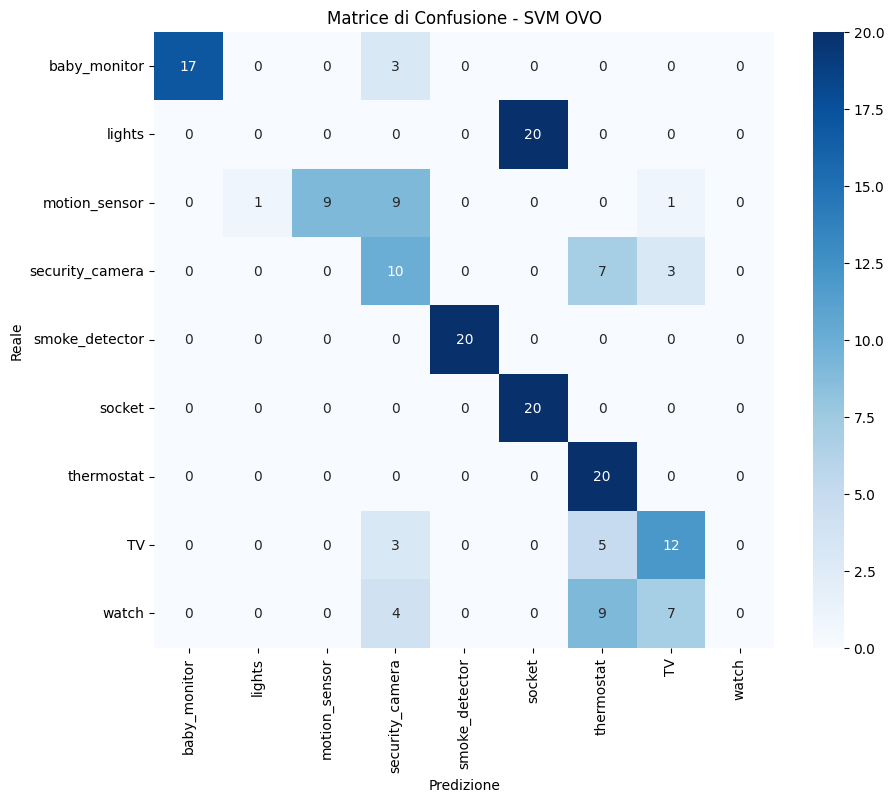

In [63]:
# Matrice di confusione
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_original, y_pred_original, labels=devices)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=devices, yticklabels=devices)
plt.title('Matrice di Confusione - SVM OVO')
plt.xlabel('Predizione')
plt.ylabel('Reale')
plt.show()


### Normalizziamo

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
ovo_svm = SVMMulticlassOVO(svm_class=KernelSVM, kernel='rbf', C=10)
ovo_svm.fit(X_train, y_train)
y_pred_ovo = ovo_svm.predict(X_test)

Addestramento di 36 classificatori SVM (OVO)...
Classificatore 1/36: classe 0 vs classe 1
Calcolo della matrice del kernel rbf...
Inizio addestramento SVM con kernel rbf usando SMO...
Addestramento completato in 3 passate!
Numero di support vectors: 2 su 160 punti (1.2%)
Classificatore 2/36: classe 0 vs classe 2
Calcolo della matrice del kernel rbf...
Inizio addestramento SVM con kernel rbf usando SMO...
Addestramento completato in 3 passate!
Numero di support vectors: 12 su 160 punti (7.5%)
Classificatore 3/36: classe 0 vs classe 3
Calcolo della matrice del kernel rbf...
Inizio addestramento SVM con kernel rbf usando SMO...
Addestramento completato in 3 passate!
Numero di support vectors: 17 su 160 punti (10.6%)
Classificatore 4/36: classe 0 vs classe 4
Calcolo della matrice del kernel rbf...
Inizio addestramento SVM con kernel rbf usando SMO...
Passata 5, 0 cambiamenti
Addestramento completato in 5 passate!
Numero di support vectors: 6 su 160 punti (3.8%)
Classificatore 5/36: classe 

In [66]:
from sklearn.metrics import classification_report

# Create mapping dictionary for original values if not already available
id_to_device = {i: device for i, device in enumerate(devices)}

# Convert numeric predictions back to original labels
y_test_original = np.array([id_to_device[y] for y in y_test.values])
y_pred_original = np.array([id_to_device[y] for y in y_pred_ovo])

# Print classification report with original labels
print(classification_report(y_test_original, y_pred_original, zero_division=0))

                 precision    recall  f1-score   support

             TV       0.52      0.60      0.56        20
   baby_monitor       1.00      0.85      0.92        20
         lights       0.00      0.00      0.00        20
  motion_sensor       1.00      0.45      0.62        20
security_camera       0.34      0.50      0.41        20
 smoke_detector       1.00      1.00      1.00        20
         socket       0.50      1.00      0.67        20
     thermostat       0.49      1.00      0.66        20
          watch       0.00      0.00      0.00        20

       accuracy                           0.60       180
      macro avg       0.54      0.60      0.54       180
   weighted avg       0.54      0.60      0.54       180



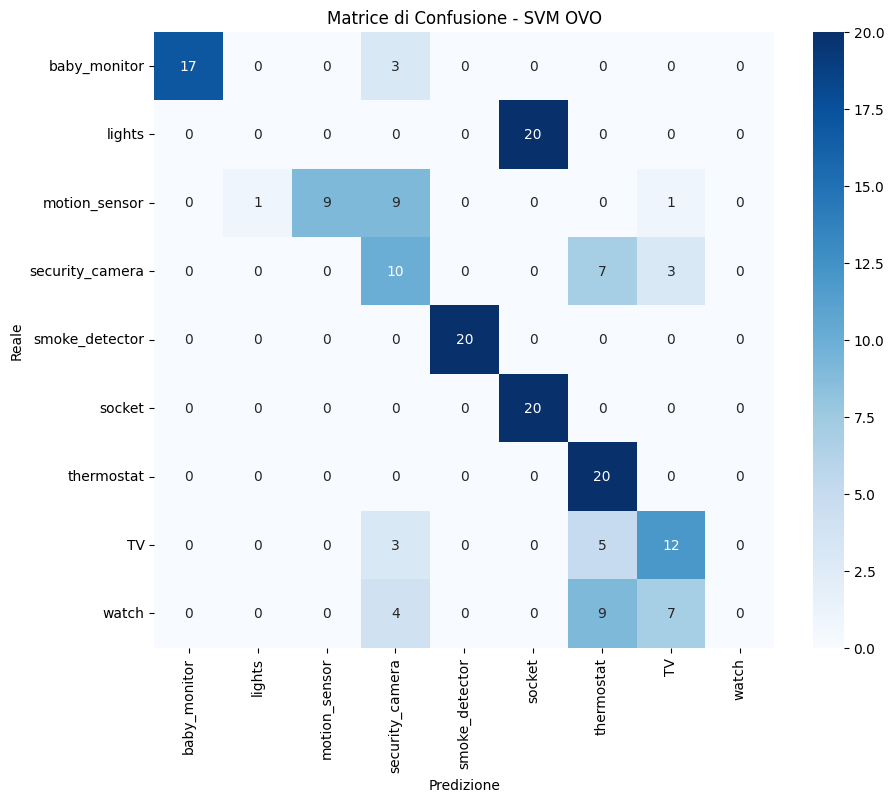

In [67]:
# Matrice di confusione
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_original, y_pred_original, labels=devices)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=devices, yticklabels=devices)
plt.title('Matrice di Confusione - SVM OVO')
plt.xlabel('Predizione')
plt.ylabel('Reale')
plt.show()


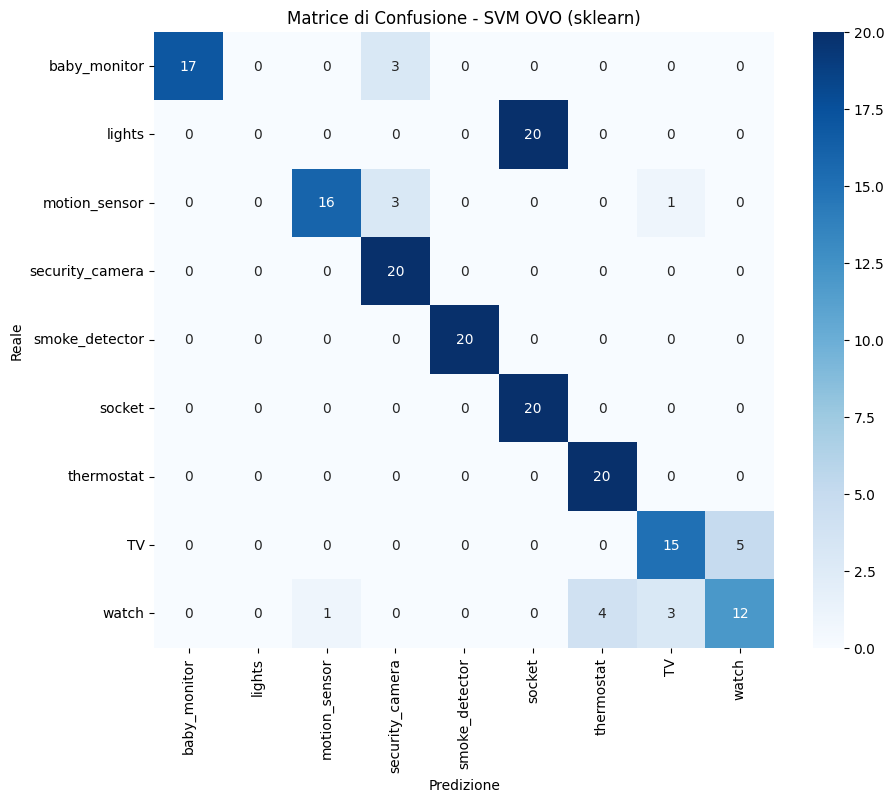


Classification Report (sklearn):
                 precision    recall  f1-score   support

             TV       0.79      0.75      0.77        20
   baby_monitor       1.00      0.85      0.92        20
         lights       0.00      0.00      0.00        20
  motion_sensor       0.94      0.80      0.86        20
security_camera       0.77      1.00      0.87        20
 smoke_detector       1.00      1.00      1.00        20
         socket       0.50      1.00      0.67        20
     thermostat       0.83      1.00      0.91        20
          watch       0.71      0.60      0.65        20

       accuracy                           0.78       180
      macro avg       0.73      0.78      0.74       180
   weighted avg       0.73      0.78      0.74       180



In [ ]:
# Implementiamo lo stesso con la libreria sklearn
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

SVC_model = SVC(kernel='rbf', C=10, gamma='scale')
SVC_model.fit(X_train, y_train)
y_pred_sklearn = SVC_model.predict(X_test)

# Convert numeric predictions back to original labels
y_pred_sklearn_original = np.array([id_to_device[y] for y in y_pred_sklearn])

# Plot confusion matrix with converted labels
cm = confusion_matrix(y_test_original, y_pred_sklearn_original, labels=devices)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=devices, yticklabels=devices)
plt.title('Matrice di Confusione - SVM OVO (sklearn)')
plt.xlabel('Predizione')
plt.ylabel('Reale')
plt.show()

# Print classification report
print("\nClassification Report (sklearn):")
print(classification_report(y_test_original, y_pred_sklearn_original, zero_division=0))